## 타이타닉 생존자 예측하기
- 데이터셋: train.csv
- 목적: 생존자 예측
- 피쳐: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
- 타겟: Survived
- 학습방법: 지도학습 - 분류
- 알고리즘 : 결정 트리, 랜덤 포레스트, 로지스틱 회귀


[1] 모듈 준비

In [58]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[2] 데이터 준비

In [59]:
file_Path = r'C:\baekjoon-solutions\연습\08\29.폴더\train.csv'

In [60]:
titanic_df = pd.read_csv(file_Path)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[2-2] 결측치 확인

In [61]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
# age는 평균으로 채우기
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [63]:
# Cabin은 결측치가 많아서 삭제
titanic_df.drop(['Cabin'],axis=1, inplace=True)

In [64]:
titanic_df.dropna(inplace=True)

In [65]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [66]:
print(titanic_df['Sex'].value_counts())
print()
print(titanic_df['Embarked'].value_counts())

Sex
male      577
female    312
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


[3] 탐색적 분석

[3-1] 성별에 따른 생존자

In [67]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

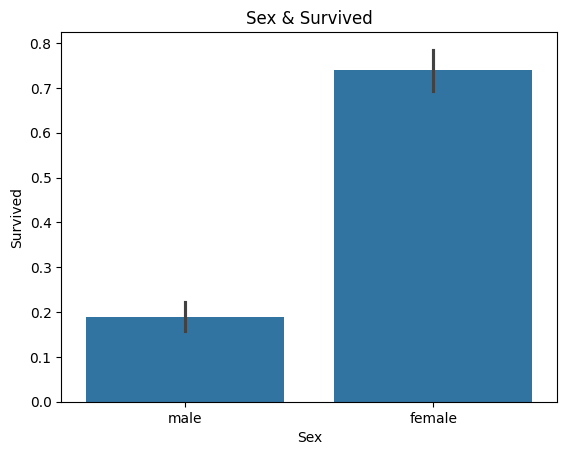

In [68]:
plt.title('Sex & Survived')
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()

[3-2] 선실 등급에 따른 생존자

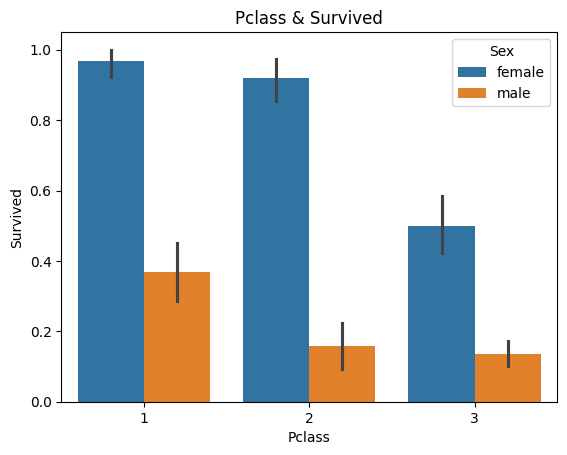

In [69]:
plt.title('Pclass & Survived')
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

[3-3] 나이대에 따른 생존자

In [70]:
custom_bins = [0, 13, 18, 35, 50, 65, 100]
ages=pd.cut(titanic_df['Age'], bins=custom_bins, labels=['Child','Teenager','Youth','Middle-age','Late Middle-age', 'Senior'])
titanic_df['ages']=ages

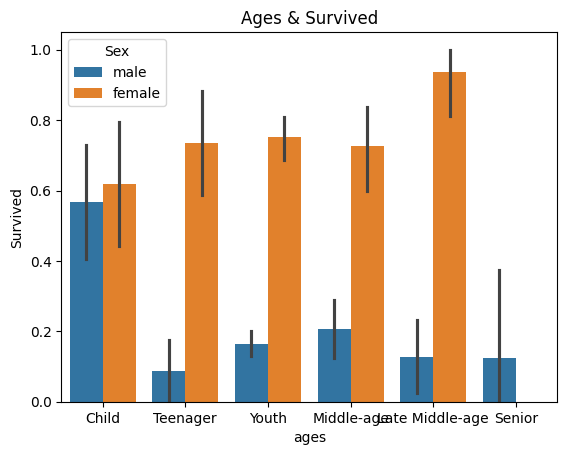

In [71]:
plt.title('Ages & Survived')
sns.barplot(x='ages', y='Survived', hue='Sex', data=titanic_df)
plt.show()

[4] 라벨 인코딩

In [72]:
from sklearn.preprocessing import LabelEncoder

[4-1] Sex 인코딩

In [73]:
# 라벨/정수 인코더 인스턴스 생성
lencoder = LabelEncoder()

In [74]:
# 라벨/정수 인코더의 범위 및 맵핑 작업
# fit(1D)
lencoder.fit(titanic_df['Sex'])

LabelEncoder()

In [75]:
titanic_df['Sex']=lencoder.transform(titanic_df['Sex'])

[4-2] Embarked 인코딩

In [77]:
# 라벨/정수 인코더 인스턴스 생성
lencoder = LabelEncoder()

In [78]:
# 라벨/정수 인코더의 범위 및 맵핑 작업
# fit(1D)
lencoder.fit(titanic_df['Embarked'])

LabelEncoder()

In [79]:
titanic_df['Embarked']=lencoder.transform(titanic_df['Embarked'])

In [80]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ages
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0,Middle-age
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,Youth
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2,Youth
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2,Youth
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2,Youth
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0,Youth


In [84]:
# 필요없어 보이는 항목제거
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'ages'], axis=1, inplace=True)

[5] 상관관계

In [85]:
titanic_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


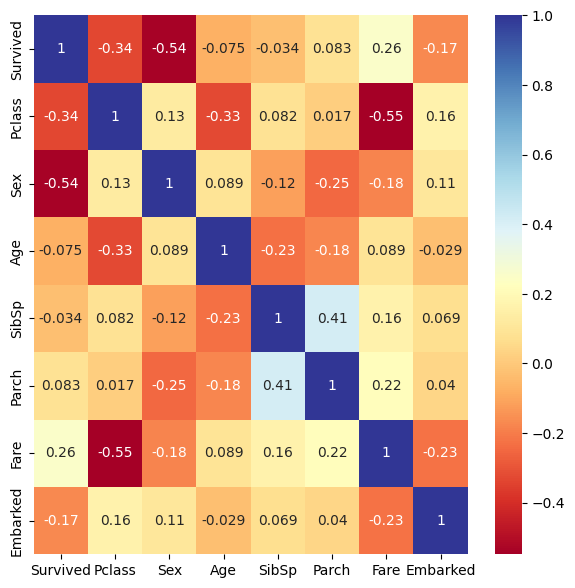

In [86]:
plt.figure(figsize=(7,7))
g = sns.heatmap(titanic_df.corr(), annot=True, cmap='RdYlBu')

[6] 학습준비

In [91]:
drop_survived_df = titanic_df.drop(columns=['Survived'])
features = drop_survived_df
target = titanic_df['Survived']
print(f'features : {features.shape}, {features.ndim}D')
print(f'target : {target.shape}, {target.ndim}D')

features : (889, 7), 2D
target : (889,), 1D


[6-1] 훈련/ 테스트 데이터 분리

In [88]:
from sklearn.model_selection import train_test_split

In [92]:

# train:test = 80:20 ==> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10 )

In [93]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (711, 7), 2D
y_train : (711,), 1D
X_test : (178, 7), 2D
y_test : (178,), 1D


[7] 알고리즘별 평가 결과 비교

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [96]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)  # 결정트리
rf_clf = RandomForestClassifier(random_state=11)  # 랜덤포레스트
lr_clf = LogisticRegression(solver='liblinear')   # 로지스틱 회귀

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.8315
RandomForestClassifier 정확도:0.8427
LogisticRegression 정확도: 0.8258


[8] 교차검증

[8-1] KFold

In [99]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(features)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = features.values[train_index], features.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7303
교차 검증 1 정확도: 0.7584
교차 검증 2 정확도: 0.7978
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.7966
평균 정확도: 0.7706


[8-2] cross_val_score

In [100]:
from sklearn.model_selection import cross_val_score

In [103]:
scores = cross_val_score(dt_clf, features, target, cv=5)

for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증 {iter_count} Accuracy: {accuracy:4f}')
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 Accuracy: 0.747191
교차 검증 1 Accuracy: 0.758427
교차 검증 2 Accuracy: 0.786517
교차 검증 3 Accuracy: 0.747191
교차 검증 4 Accuracy: 0.807910
평균 정확도: 0.7694
